In [1]:
import pandas as pd
import numpy as np
import re
import csv
import pickle
import emoji
import demoji
from urlextract import URLExtract
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from string import punctuation
import random
random.seed("ic2s2colgne")
from nltk.sentiment import vader
from nltk.corpus import stopwords
import nltk
import gensim
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pandas as pd
import seaborn as sns
import random
from datetime import datetime
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
import nltk
nltk.download('punkt')

print("STARTING NOW:",str(datetime.now()))

STARTING NOW: 2022-02-07 13:13:45.368174


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/m.simonuva.nl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/m.simonuva.nl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
#read in date column as datetime

chats = pd.read_csv('/Users/m.simonuva.nl/GitHub/FYP/chats_all.csv', parse_dates = ['date'])
#chats.loc[1121787, 'date'] parsed dates as datetime worked
#unique_user = chats['sender_id'].unique()
#print(unique_chats) #in reality 80 since one group was really a channel

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
unique_chats = chats['chat'].unique()
print(len(unique_chats))

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: 'chat'

In [11]:
chats

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0                      date  \
0               130 2017-10-14 21:31:16+00:00   
1               131 2017-10-14 21:34:51+00:00   
2               132 2017-10-14 21:38:01+00:00   
3               133 2017-10-14 21:43:47+00:00   
4               134 2017-10-14 21:47:05+00:00   
...             ...                       ...   
1805003     2033653 2021-06-18 16:04:54+00:00   
1805004     2033654 2021-06-18 16:11:34+00:00   
1805005     2033655 2021-06-18 16:27:26+00:00   
1805006     2033656 2021-06-18 16:34:19+00:00   
1805007     2033659 2021-06-18 16:45:19+00:00   

                                                 url  \
0                              https://t.me/FvDgroup   
1                              https://t.me/FvDgroup   
2                              https://t.me/FvDgroup   
3                              https://t.me/FvDgroup   
4                              https://t.me/FvDgroup   
...                                              ...   
1805003           https://t.me/mondkapjesverzetgroep   
1805004           https://t.me/mondkapjesverzetgroep   
1805005  https://t.me/bronvanonvoorwaardelijkeliefde   
1805006           https://t.me/mondkapjesverzetgroep   
1805007           https://t.me/mondkapjesverzetgroep   

                                                 user_data  message_id  \
0        User(id=14726745, is_self=False, contact=False...         2.0   
1        User(id=1056843, is_self=False, contact=False,...         3.0   
2        User(id=14726745, is_self=False, contact=False...         4.0   
3        User(id=14726745, is_self=False, contact=False...         5.0   
4        User(id=14726745, is_self=False, contact=False...         6.0   
...                                                    ...         ...   
1805003  User(id=1561748967, is_self=False, contact=Fal...     52301.0   
1805004  User(id=1561748967, is_self=False, contact=Fal...     52302.0   
1805005  User(id=1583442846, is_self=False, contact=Fal...      8048.0   
1805006  User(id=1373812157, is_self=False, contact=Fal...     52303.0   
1805007  User(id=1067769489, is_self=False, contact=Fal...     52304.0   

                                                      text  
0        NRC: Een referendum over het afschaffen van he...  
1                                                      NaN  
2                                                      NaN  
3        Binnenlands Bestuur [naar eigen zeggen"een kwa...  
4        Reformatorisch Dagblad: "De opmars van Baudets...  
...                                                    ...  
1805003  Jensen – Oneindige domheid https://hetandereni...  
1805004  De #EU houdt #Nederland #gegijzeld. Ons nation...  
1805005  En hier is weer de nieuwe Jensen.\n\nONEINDIGE...  
1805006                                                NaN  
1805007                                                NaN  

[1805008 rows x 6 columns]

In [6]:
#create new column with type = channel or chat based on user_data column values
chats.loc[chats['user_data'].str.contains('User\(', na=False), 'type'] = 'chat'
chats.loc[chats['user_data'].str.contains('Channel\(', na=False), 'type'] = 'channel'

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence \(
<>:3: DeprecationWarning: invalid escape sequence \(
<>:2: DeprecationWarning: invalid escape sequence \(
<>:3: DeprecationWarning: invalid escape sequence \(
<ipython-input-6-2394521d1012>:2: DeprecationWarning: invalid escape sequence \(
  chats.loc[chats['user_data'].str.contains('User\(', na=False), 'type'] = 'chat'
<ipython-input-6-2394521d1012>:3: DeprecationWarning: invalid escape sequence \(
  chats.loc[chats['user_data'].str.contains('Channel\(', na=False), 'type'] = 'channel'


KeyError: 'user_data'

In [ ]:
len(chats[chats['type'].str.contains('channel', na = False)]) # seems like there are some channels in the chats df

In [ ]:
chats.loc[chats.url == "https://t.me/coronavaccinschatgroep", "type"] = "channel" #manually screened and found one channel, recode the nans on type to channel for messages from the same channel based on url column

In [ ]:
chats #worked

In [ ]:
channels = pd.read_csv('/Users/m.simonuva.nl/GitHub/FYP/channels_all.csv', parse_dates = ['date'])
unique_channels = channels['url'].unique()
print(len(unique_channels))

In [ ]:
channels.loc[channels['user_data'].str.contains('Channel\(', na=False), 'type'] = 'channel'
channels.loc[channels['user_data'].str.contains('User\(', na=False), 'type'] = 'chat'

In [ ]:
data = [chats, channels]
df = pd.concat(data, ignore_index = True)

In [ ]:
print(df['type'])

In [ ]:
df.type.nunique() #only channels and chats values present, no more nans

# Data Cleaning

In [ ]:
#test = chats.sample(100)

In [ ]:
#fuctions to break down user_data
def user_fake(user_row):
    try:
        for user_characteristic in user_row[5:-1].split(','):
            try:
                a,b = user_characteristic.split('=')
                if a.strip() == 'fake':
                    return(b)
            except:
                pass
    except:
        return(None)
   
def user_bot(user_row):
    try:
        for user_characteristic in user_row[5:-1].split(','):
            try:
                a,b = user_characteristic.split('=')
                if a.strip() == 'bot':
                    return(b)
            except:
                pass
    except:
        return(None)


def user_id(user_row):
    try:
        for user_characteristic in user_row[5:-1].split(','):
            try:
                a,b = user_characteristic.split('=')
                if a.strip() == 'id':
                    return(b)
            except:
                pass
    except:
        return(None)
    
#fix this for channel id column    
def channel_id(channel_row):
    try:
        for channel_characteristic in channel_row[8:-1].split(','):
            try:
                a,b = channel_characteristic.split('=')
                if a.strip() == 'id':ˀƒ
                    return(b)
            except:
                pass
    except:
        pass
    
def first_name(user_row):
    try:
        for user_characteristic in user_row[5:-1].split(','):
            try:
                a,b = user_characteristic.split('=')
                if a.strip() == 'first_name':
                    return(b)
            except:
                pass
    except:
        return(None)

def last_name(user_row):
    try:
        for user_characteristic in user_row[5:-1].split(','):
            try:
                a,b = user_characteristic.split('=')
                if a.strip() == 'last_name':
                    return(b)
            except:
                pass
    except:
        return(None)



def username(user_row):
    try:
        for user_characteristic in user_row[5:-1].split(','):
            try:
                a,b = user_characteristic.split('=')
                if a.strip() == 'username':
                    return(b)
            except:
                pass
    except:
        return(None)

def restricted(user_row):
    try:
        for user_characteristic in user_row[5:-1].split(','):
            try:
                a,b = user_characteristic.split('=')
                if a.strip() == 'restricted':
                    return(b)
            except:
                pass
    except:
        return(None)
    
    
#def channel_title(channel_row):
    try:
        for channel_characteristic in channel_row[5:-1].split(','):
            try:
                a,b = channel_characteristic.split('=')
                if a.strip() == 'title':
                    return(b)
            except:
                pass
    except:
        return(None)


#def gigagroup(channel_row):
    try:
        for channel_characteristic in channel_row[5:-1].split(','):
            try:
                a,b = channel_characteristic.split('=')
                if a.strip() == 'gigagroup':
                    return(b)
            except:
                pass
    except:
        return(None)
    

In [ ]:
#chats['bot'] = chats['user_data'].apply(lambda x: user_bot(x))
#chats['fake'] = chats['user_data'].apply(lambda x: user_fake(x))
df['id'] = df['user_data'].apply(lambda x: user_id(x))
#chats['first_name'] = chats['user_data'].apply(lambda x: first_name(x))
#chats['last_name'] = chats['user_data'].apply(lambda x: last_name(x))
#chats['username'] = chats['user_data'].apply(lambda x: username(x))
#chats['restricted'] = chats['user_data'].apply(lambda x: restricted(x))
#channels['title'] = channels['user_data'].apply(lambda x: channel_title(x))
#channels['gigagroup'] = channels['user_data'].apply(lambda x: gigagroup(x))


In [ ]:
df.head(20)

In [ ]:
#remove nans on text
#df = df[pd.notnull(df['text'])]

In [ ]:
#nouser = chats[pd.isnull(chats['user_data'])]

In [ ]:
#lowercase text
df['text_lower']  = df['text'].str.lower()
df['text_lower'].head()

In [ ]:
#remove all hyperlinks from text and save text into new column
df['nolink_text'] = df['text_lower'].apply(lambda x: re.split('https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*', str(x))[0])
#df['nolink_text'].head()

In [ ]:
#extract hyperlinks from text into new column
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)' #wrap pattern in capturng group to be able to extract urls
df['links']= df['text'].astype(str)
df['links']= df["text"].str.extract(pattern, expand=True)
df.head()

In [ ]:
#replace emoji pattern with text
def emoji2text(text_column):
    '''replaces emojis with their textual meaning in a df row'''
    try:
        c_text = emoji.demojize(text_column).strip()
        return(c_text)
    except:
        pass
df['noemoji_text'] = df['nolink_text'].apply(lambda x: emoji2text(x))

In [ ]:
#add space around emojis wrapped in : :
df['spaced_text'] = df['noemoji_text'].apply(lambda x: re.sub('(?<=\w)([:])', r' \1', str(x)))

In [ ]:
#removing punctuation, creating a new column called 'text_punct]'
df['text_clean'] = df['spaced_text'].str.replace('[^\w\s]','') 
df['text_clean'].head()

In [ ]:
#write cleaned df to csv
df.to_csv('/Users/m.simonuva.nl/GitHub/Telegram-scraper/Telegram-scraper/cleaned_data.csv', index = None)

# Links 

In [90]:
#read clean text csv
df = pd.read_csv('/Users/m.simonuva.nl/GitHub/Telegram-scraper/Telegram-scraper/cleaned_data.csv', parse_dates = ['date'])

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
print(len(df['links'])) #before removing NANs

2033663


/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
#urls without nans
df1 = df[df['links'].notna()]
print(len(df1['links']))

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


362837


In [94]:
df1.to_csv('/Users/m.simonuva.nl/GitHub/Telegram-scraper/Telegram-scraper/link_based.csv', index = None)

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
df1['link_frequency'] = df1['links'].map(df1['links'].value_counts())

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-53-85b2527562f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['link_frequency'] = df1['links'].map(df1['links'].value_counts())


In [54]:
df1

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


url                      date  \
13          https://t.me/fvd_nl 2021-06-17 08:09:47+00:00   
14          https://t.me/fvd_nl 2021-06-16 20:35:06+00:00   
18          https://t.me/fvd_nl 2021-06-16 13:39:01+00:00   
23          https://t.me/fvd_nl 2021-06-16 11:43:04+00:00   
30          https://t.me/fvd_nl 2021-06-16 03:47:28+00:00   
...                         ...                       ...   
2033645  https://t.me/fvdgeluid 2021-01-04 23:04:15+00:00   
2033649  https://t.me/fvdgeluid 2021-01-03 20:37:56+00:00   
2033655  https://t.me/fvdgeluid 2021-01-03 14:09:37+00:00   
2033659  https://t.me/fvdgeluid 2021-01-03 09:56:09+00:00   
2033661  https://t.me/fvdgeluid 2021-01-02 23:20:50+00:00   

                                                 user_data  message_id  \
13       User(id=1413520180, is_self=False, contact=Fal...     15690.0   
14       User(id=1053403929, is_self=False, contact=Fal...     15688.0   
18       User(id=827101534, is_self=False, contact=Fals...     15671.0   
23       User(id=949791090, is_self=False, contact=Fals...     15656.0   
30       User(id=1396449004, is_self=False, contact=Fal...     15646.0   
...                                                    ...         ...   
2033645  Channel(id=1390936433, title='Forum voor Democ...        21.0   
2033649  Channel(id=1390936433, title='Forum voor Democ...        17.0   
2033655  Channel(id=1390936433, title='Forum voor Democ...        11.0   
2033659  Channel(id=1390936433, title='Forum voor Democ...         6.0   
2033661  Channel(id=1390936433, title='Forum voor Democ...         2.0   

                                                      text     type  \
13                            https://youtu.be/GDjjXw-ezDU     chat   
14       ✋😔🤚ZEKER EEN GOEDE SAMENWERKING "DRUKKERIJ VAN...     chat   
18             https://www.youtube.com/watch?v=AW1dDE1CHJo     chat   
23       https://debatdirect.tweedekamer.nl/2021-06-16/...     chat   
30       Subscribe: @SecretPatriotQ\n\nShare and FOLLOW...     chat   
...                                                    ...      ...   
2033645  De EU zit nooit stil. Er is maar 1 route. De r...  channel   
2033649  Laatste data rond vaccin bijwerkingen vanuit d...  channel   
2033655  Kijken jullie mee naar deze livestream van "Vr...  channel   
2033659  Teken deze petitie om aandacht te vragen voor ...  channel   
2033661  Wil je met andere FvD leden in discussie of on...  channel   

                   id                                         text_lower  \
13       1.413520e+09                       https://youtu.be/gdjjxw-ezdu   
14       1.053404e+09  ✋😔🤚zeker een goede samenwerking "drukkerij van...   
18       8.271015e+08        https://www.youtube.com/watch?v=aw1dde1chjo   
23       9.497911e+08  https://debatdirect.tweedekamer.nl/2021-06-16/...   
30       1.396449e+09  subscribe: @secretpatriotq\n\nshare and follow...   
...               ...                                                ...   
2033645           NaN  de eu zit nooit stil. er is maar 1 route. de r...   
2033649           NaN  laatste data rond vaccin bijwerkingen vanuit d...   
2033655           NaN  kijken jullie mee naar deze livestream van "vr...   
2033659           NaN  teken deze petitie om aandacht te vragen voor ...   
2033661           NaN  wil je met andere fvd leden in discussie of on...   

                                               nolink_text  \
13                                                     NaN   
14       ✋😔🤚zeker een goede samenwerking "drukkerij van...   
18                                                     NaN   
23                                                     NaN   
30       subscribe: @secretpatriotq\n\nshare and follow...   
...                                                    ...   
2033645  de eu zit nooit stil. er is maar 1 route. de r...   
2033649  laatste data rond vaccin bijwerkingen vanuit d...   
2033655  kijken jullie mee naar deze livestream van "vr...   
2033659  teken deze 

In [ ]:
print(len(df1[df1.duplicated(subset=['links'],keep=False)])) # number of duplicate links 

In [ ]:
print(len(df1['links'].unique())) #number of unique links

In [56]:
df1['source'] = df1['url'].map(lambda x: x.split("/t.me/",1)[1])

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-56-d1bb764b8831>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['source'] = df1['url'].map(lambda x: x.split("/t.me/",1)[1])


In [57]:
#rearrange columns of df1
df1 = df1[['date', 'url', 'source', 'type', 'user_data', 'id', 'message_id','text_clean', 'links', 'link_frequency', 'text', 'text_lower', 'nolink_text', 'noemoji_text', 'spaced_text']] 

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
df1

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                     url     source     type  \
13      2021-06-17 08:09:47+00:00     https://t.me/fvd_nl     fvd_nl     chat   
14      2021-06-16 20:35:06+00:00     https://t.me/fvd_nl     fvd_nl     chat   
18      2021-06-16 13:39:01+00:00     https://t.me/fvd_nl     fvd_nl     chat   
23      2021-06-16 11:43:04+00:00     https://t.me/fvd_nl     fvd_nl     chat   
30      2021-06-16 03:47:28+00:00     https://t.me/fvd_nl     fvd_nl     chat   
...                           ...                     ...        ...      ...   
2033645 2021-01-04 23:04:15+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   
2033649 2021-01-03 20:37:56+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   
2033655 2021-01-03 14:09:37+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   
2033659 2021-01-03 09:56:09+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   
2033661 2021-01-02 23:20:50+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   

                                                 user_data            id  \
13       User(id=1413520180, is_self=False, contact=Fal...  1.413520e+09   
14       User(id=1053403929, is_self=False, contact=Fal...  1.053404e+09   
18       User(id=827101534, is_self=False, contact=Fals...  8.271015e+08   
23       User(id=949791090, is_self=False, contact=Fals...  9.497911e+08   
30       User(id=1396449004, is_self=False, contact=Fal...  1.396449e+09   
...                                                    ...           ...   
2033645  Channel(id=1390936433, title='Forum voor Democ...           NaN   
2033649  Channel(id=1390936433, title='Forum voor Democ...           NaN   
2033655  Channel(id=1390936433, title='Forum voor Democ...           NaN   
2033659  Channel(id=1390936433, title='Forum voor Democ...           NaN   
2033661  Channel(id=1390936433, title='Forum voor Democ...           NaN   

         message_id                                         text_clean  \
13          15690.0                                                NaN   
14          15688.0  raised_hand pensive_face raised_back_of_hand z...   
18          15671.0                                                NaN   
23          15656.0                                                NaN   
30          15646.0  subscribe  secretpatriotq\n\nshare and follow\...   
...             ...                                                ...   
2033645        21.0  de eu zit nooit stil er is maar 1 route de rou...   
2033649        17.0  laatste data rond vaccin bijwerkingen vanuit d...   
2033655        11.0  kijken jullie mee naar deze livestream van vro...   
2033659         6.0  teken deze petitie om aandacht te vragen voor ...   
2033661         2.0  wil je met andere fvd leden in discussie of on...   

                                                     links  link_frequency  \
13                            https://youtu.be/GDjjXw-ezDU               2   
14                                  https://t.me/postnl/24               2   
18             https://www.youtube.com/watch?v=AW1dDE1CHJo               2   
23       https://debatdirect.tweedekamer.nl/2021-06-16/...               1   
30                             https://t.me/secretpatriotq               7   
...                                                    ...             ...   
2033645  https://nexitdenktank.nl/analyse-de-eu-creeert...               1   
2033649                             https://vaers.hhs.gov/               5   
2033655  https://www.facebook.com/FVDBreda/posts/105288...               1   
2033659  https://secure.avaaz.org/community_petitions/n...               1   
2033661                           https://t.me/fvdgeluiden              23   

                                                      text  \
13                            https://youtu.be/GDjjXw-ezDU   
14       ✋😔🤚ZEKER EEN GOEDE SAMENWERKING "DRUKKERIJ VAN...   
18             https://www.youtube.com/watch?v=AW1dDE1CHJo   
23       https://debatdirect.tweedekamer.nl/2021-06-16/...   
30     

In [62]:
#data for testing fr Kasper
header = ["links", "link_frequency"]
df1.to_csv('/Users/m.simonuva.nl/GitHub/Telegram-scraper/Telegram-scraper/links.csv', index = None, columns = header)

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
links = pd.read_csv('/Users/m.simonuva.nl/GitHub/Telegram-scraper/Telegram-scraper/links.csv')

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
links

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


links  link_frequency
0                            https://youtu.be/GDjjXw-ezDU               2
1                                  https://t.me/postnl/24               2
2             https://www.youtube.com/watch?v=AW1dDE1CHJo               2
3       https://debatdirect.tweedekamer.nl/2021-06-16/...               1
4                             https://t.me/secretpatriotq               7
...                                                   ...             ...
362832  https://nexitdenktank.nl/analyse-de-eu-creeert...               1
362833                             https://vaers.hhs.gov/               5
362834  https://www.facebook.com/FVDBreda/posts/105288...               1
362835  https://secure.avaaz.org/community_petitions/n...               1
362836                           https://t.me/fvdgeluiden              23

[362837 rows x 2 columns]

In [ ]:
#save df1 as csv file with no NANs on links and frewquency counts of links

df1.to_csv('/Users/m.simonuva.nl/GitHub/Telegram-scraper/Telegram-scraper/data_with_links.csv', index = None)

In [2]:
df1 = pd.read_csv('/Users/m.simonuva.nl/GitHub/Telegram-scraper/Telegram-scraper/data_with_links.csv', parse_dates = ['date'])

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
df1 = df1[df1['link_frequency'] > 1]
df1 # 192984 rows with links that are appearing at least twice

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                     url     source     type  \
0      2021-06-17 08:09:47+00:00     https://t.me/fvd_nl     fvd_nl     chat   
1      2021-06-16 20:35:06+00:00     https://t.me/fvd_nl     fvd_nl     chat   
2      2021-06-16 13:39:01+00:00     https://t.me/fvd_nl     fvd_nl     chat   
4      2021-06-16 03:47:28+00:00     https://t.me/fvd_nl     fvd_nl     chat   
5      2021-06-15 20:30:30+00:00     https://t.me/fvd_nl     fvd_nl     chat   
...                          ...                     ...        ...      ...   
362822 2021-01-10 17:50:22+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   
362827 2021-01-07 15:31:36+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   
362829 2021-01-06 22:18:15+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   
362833 2021-01-03 20:37:56+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   
362836 2021-01-02 23:20:50+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   

                                                user_data            id  \
0       User(id=1413520180, is_self=False, contact=Fal...  1.413520e+09   
1       User(id=1053403929, is_self=False, contact=Fal...  1.053404e+09   
2       User(id=827101534, is_self=False, contact=Fals...  8.271015e+08   
4       User(id=1396449004, is_self=False, contact=Fal...  1.396449e+09   
5       User(id=474734395, is_self=False, contact=Fals...  4.747344e+08   
...                                                   ...           ...   
362822  Channel(id=1390936433, title='Forum voor Democ...           NaN   
362827  Channel(id=1390936433, title='Forum voor Democ...           NaN   
362829  Channel(id=1390936433, title='Forum voor Democ...           NaN   
362833  Channel(id=1390936433, title='Forum voor Democ...           NaN   
362836  Channel(id=1390936433, title='Forum voor Democ...           NaN   

        message_id                                         text_clean  \
0          15690.0                                                NaN   
1          15688.0  raised_hand pensive_face raised_back_of_hand z...   
2          15671.0                                                NaN   
4          15646.0  subscribe  secretpatriotq\n\nshare and follow\...   
5          15641.0                                                NaN   
...            ...                                                ...   
362822        67.0  vanavond zijn thierry baudet en wybren van hag...   
362827        42.0                           een interessant artikel    
362829        36.0  aantal coronadoden 2020 volgens officiële bron...   
362833        17.0  laatste data rond vaccin bijwerkingen vanuit d...   
362836         2.0  wil je met andere fvd leden in discussie of on...   

                                                    links  link_frequency  \
0                            https://youtu.be/GDjjXw-ezDU               2   
1                                  https://t.me/postnl/24               2   
2             https://www.youtube.com/watch?v=AW1dDE1CHJo               2   
4                             https://t.me/secretpatriotq               7   
5       https://t.me/RevolutieNL?voicechat=ae3ba3096ab...               4   
...                                                   ...             ...   
362822  https://winkel.forumvoordemocratie.nl/products...               8   
362827  https://www.hpdetijd.nl/2021-01-07/het-coronav...              27   
362829                           https://t.me/fvdgeluiden              23   
362833                             https://vaers.hhs.gov/               5   
362836                           https://t.me/fvdgeluiden              23   

                                                     text  \
0                            https://youtu.be/GDjjXw-ezDU   
1       ✋😔🤚ZEKER EEN GOEDE SAMENWERKING "DRUKKERIJ VAN...   
2             https://www.youtube.com/watch?v=AW1dDE1CHJo   
4       Subscribe: @SecretPatriotQ\n\nShare and FOLLOW...   
5       https://t.me/RevolutieNL?voicechat=ae3ba3096ab...  

In [4]:
#parse urls
from urllib.parse import urlparse
df1['parsed_links'] = df1['links'].apply(lambda x: urlparse(x))
df1['parsed_links'].iloc[79]

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
#test = df1.sample(2)
#test.dtypes
#test['parsed_links'].iloc[-1]
#for e in test['parsed_links']:
    #print(e[1])

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
def getdomain(link_row):
    ''' returns the domain at position one (i.e., netloc) from a tuple in a df'''
    try:
        return link_row[1]
    except:
        return(None) 

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
df1['domain'] = df1['parsed_links'].apply(lambda x: getdomain(x))
df1['domain']

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                              youtu.be
1                                  t.me
2                       www.youtube.com
4                                  t.me
5                                  t.me
                      ...              
362822    winkel.forumvoordemocratie.nl
362827                  www.hpdetijd.nl
362829                             t.me
362833                    vaers.hhs.gov
362836                             t.me
Name: domain, Length: 192984, dtype: object

In [31]:
df1['domain'] = df1['domain'].str.lower()


/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
df1['domain'] = df1['domain'].str.strip('www.')

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
df1['domain_frequency'] = df1['domain'].map(df1['domain'].value_counts())

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
#df1['domain_frequency'].max() #37883
#df1['domain_frequency'].min() #2

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


37883

In [89]:
df1.groupby(['source', 'links', 'type']).count()
df1

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                     url     source     type  \
0      2021-06-17 08:09:47+00:00     https://t.me/fvd_nl     fvd_nl     chat   
1      2021-06-16 20:35:06+00:00     https://t.me/fvd_nl     fvd_nl     chat   
2      2021-06-16 13:39:01+00:00     https://t.me/fvd_nl     fvd_nl     chat   
4      2021-06-16 03:47:28+00:00     https://t.me/fvd_nl     fvd_nl     chat   
5      2021-06-15 20:30:30+00:00     https://t.me/fvd_nl     fvd_nl     chat   
...                          ...                     ...        ...      ...   
362822 2021-01-10 17:50:22+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   
362827 2021-01-07 15:31:36+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   
362829 2021-01-06 22:18:15+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   
362833 2021-01-03 20:37:56+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   
362836 2021-01-02 23:20:50+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   

                                                user_data            id  \
0       User(id=1413520180, is_self=False, contact=Fal...  1.413520e+09   
1       User(id=1053403929, is_self=False, contact=Fal...  1.053404e+09   
2       User(id=827101534, is_self=False, contact=Fals...  8.271015e+08   
4       User(id=1396449004, is_self=False, contact=Fal...  1.396449e+09   
5       User(id=474734395, is_self=False, contact=Fals...  4.747344e+08   
...                                                   ...           ...   
362822  Channel(id=1390936433, title='Forum voor Democ...           NaN   
362827  Channel(id=1390936433, title='Forum voor Democ...           NaN   
362829  Channel(id=1390936433, title='Forum voor Democ...           NaN   
362833  Channel(id=1390936433, title='Forum voor Democ...           NaN   
362836  Channel(id=1390936433, title='Forum voor Democ...           NaN   

        message_id                                         text_clean  \
0          15690.0                                                NaN   
1          15688.0  raised_hand pensive_face raised_back_of_hand z...   
2          15671.0                                                NaN   
4          15646.0  subscribe  secretpatriotq\n\nshare and follow\...   
5          15641.0                                                NaN   
...            ...                                                ...   
362822        67.0  vanavond zijn thierry baudet en wybren van hag...   
362827        42.0                           een interessant artikel    
362829        36.0  aantal coronadoden 2020 volgens officiële bron...   
362833        17.0  laatste data rond vaccin bijwerkingen vanuit d...   
362836         2.0  wil je met andere fvd leden in discussie of on...   

                                                    links  link_frequency  \
0                            https://youtu.be/GDjjXw-ezDU               2   
1                                  https://t.me/postnl/24               2   
2             https://www.youtube.com/watch?v=AW1dDE1CHJo               2   
4                             https://t.me/secretpatriotq               7   
5       https://t.me/RevolutieNL?voicechat=ae3ba3096ab...               4   
...                                                   ...             ...   
362822  https://winkel.forumvoordemocratie.nl/products...               8   
362827  https://www.hpdetijd.nl/2021-01-07/het-coronav...              27   
362829                           https://t.me/fvdgeluiden              23   
362833                             https://vaers.hhs.gov/               5   
362836                           https://t.me/fvdgeluiden              23   

                                                     text  \
0                            https://youtu.be/GDjjXw-ezDU   
1       ✋😔🤚ZEKER EEN GOEDE SAMENWERKING "DRUKKERIJ VAN...   
2             https://www.youtube.com/watch?v=AW1dDE1CHJo   
4       Subscribe: @SecretPatriotQ\n\nShare and FOLLOW...   
5       https://t.me/RevolutieNL?voicechat=ae3ba3096ab...  

In [38]:
df1.loc[df1['domain_frequency'] == 37883] #Youtube
#df1.loc[df1['domain_frequency']== 2]

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                     url     source     type  \
0      2021-06-17 08:09:47+00:00     https://t.me/fvd_nl     fvd_nl     chat   
6      2021-06-15 16:20:15+00:00     https://t.me/fvd_nl     fvd_nl     chat   
7      2021-06-15 16:19:23+00:00     https://t.me/fvd_nl     fvd_nl     chat   
9      2021-06-14 19:07:17+00:00     https://t.me/fvd_nl     fvd_nl     chat   
13     2021-06-13 11:53:36+00:00     https://t.me/fvd_nl     fvd_nl     chat   
...                          ...                     ...        ...      ...   
362709 2021-02-23 10:20:33+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   
362711 2021-02-21 19:39:36+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   
362715 2021-02-21 10:20:25+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   
362722 2021-02-19 09:59:15+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   
362754 2021-01-31 16:11:14+00:00  https://t.me/fvdgeluid  fvdgeluid  channel   

                                                user_data            id  \
0       User(id=1413520180, is_self=False, contact=Fal...  1.413520e+09   
6       User(id=1036480136, is_self=False, contact=Fal...  1.036480e+09   
7       User(id=1036480136, is_self=False, contact=Fal...  1.036480e+09   
9       User(id=1672287102, is_self=False, contact=Fal...  1.672287e+09   
13      User(id=1531849852, is_self=False, contact=Fal...  1.531850e+09   
...                                                   ...           ...   
362709  Channel(id=1390936433, title='Forum voor Democ...           NaN   
362711  Channel(id=1390936433, title='Forum voor Democ...           NaN   
362715  Channel(id=1390936433, title='Forum voor Democ...           NaN   
362722  Channel(id=1390936433, title='Forum voor Democ...           NaN   
362754  Channel(id=1390936433, title='Forum voor Democ...           NaN   

        message_id                                         text_clean  \
0          15690.0                                                NaN   
6          15639.0  euro_banknote  de europese unie wil van nederl...   
7          15638.0                                                NaN   
9          15598.0                                                NaN   
13         15579.0                                                NaN   
...            ...                                                ...   
362709       430.0                                                NaN   
362711       423.0                                                NaN   
362715       417.0                                                NaN   
362722       406.0                                                NaN   
362754       286.0  duncan  ik ben een trotse nederlander het doet...   

                               links  link_frequency  \
0       https://youtu.be/GDjjXw-ezDU               2   
6       https://youtu.be/YtEE0pyGbYg               9   
7       https://youtu.be/YtEE0pyGbYg               9   
9       https://youtu.be/4OHmMKrVbNk              18   
13      https://youtu.be/syhiEXJ9z-Y              11   
...                              ...             ...   
362709  https://youtu.be/JLyyVte5wFM               4   
362711  https://youtu.be/4zHZ06EHoII               8   
362715  https://youtu.be/LJ5eyF4W1eY               6   
362722  https://youtu.be/c8t-PIl91S0               5   
362754  https://youtu.be/Rt42AC1f8fw               3   

                                                     text  \
0                            https://youtu.be/GDjjXw-ezDU   
6       💶 De Europese Unie wil van Nederlands belastin...   
7       https://youtu.be/YtEE0pyGbYg\n.\nJa21 en gvh z...   
9                            https://youtu.be/4OHmMKrVbNk   
13                           https://youtu.be/syhiEXJ9z-Y   
...                                                   ...   
362709                       https://youtu.be/JLyyVte5wFM   
362711                       https://youtu.be/4zHZ06EHoII   
362715                       https://youtu.be/LJ5eyF4W1eY   
362722

# Group data by daily links shared per chat/channel

### Like this we obtain a time ordered df that shows what links were shared by which channels and chat on a given day.
### Note that this dataset excludes unique URL-s that only appeared once in the dataset



In [45]:
df2 = pd.DataFrame(df1.groupby([pd.Grouper(freq ="D", key = 'date'), 'links'])['source'].agg(lambda x: "  ".join(x))) #hourly sharing of urls per channel/chat
df2['source'].iloc[0]


/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll  geenstijll'

In [ ]:
#df2['amount_sources'] = df2['url'].str.count(r" , ") +1 #can be the same

In [46]:
df2['unique_sources'] = df2['source'].str.split().apply(lambda x: ' , '.join(list(set(x))))
df2['unique_sources'].iloc[79]

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'natuurlijf_chat , natuurlijf'

In [47]:
df2['unique_sources'] = df2['unique_sources'].str.lstrip(',') 
df2['unique_sources'].iloc[79]

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'natuurlijf_chat , natuurlijf'

In [48]:
df2['unique_source_count'] = df2['unique_sources'].str.count(r" , ")+1 #show number of unique sources- +1 added since if the source is unique no comma available
df2

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


source  \
date                      links                                                                                                   
2018-08-10 00:00:00+00:00 https://www.geenstijl.nl/5143338/t                  geenstijll  geenstijll  geenstijll  geenstijll...   
2018-08-18 00:00:00+00:00 https://www.geenstijl.nl/5143446/feynman-en-of-...                             geenstijll  geenstijll   
2018-09-11 00:00:00+00:00 https://www.geenstijl.nl/5143821/een-belastinga...                 geenstijll  geenstijll  geenstijll   
2018-09-12 00:00:00+00:00 https://tpo.nl/2018/09/12/haagse-isis-aanhanger...                       thepostonline  thepostonline   
2018-09-18 00:00:00+00:00 https://tpo.nl/2018/09/18/jeugdbescherming-brab...                       thepostonline  thepostonline   
...                                                                                                                         ...   
2021-06-18 00:00:00+00:00 https://youtu.be/trjvO7Q3bdg                                                             wwncommunity   
                          https://youtu.be/u0tjvV_BIcc                                         DeBataafseRepubliek  klokkenchat   
                          https://youtu.be/vUrp5PlnBwQ                                  wakkerAmsterdam  coronavaccinschatgroep   
                          https://youtu.be/w31kYhzxmeY                                                       nederlandsverzet21   
                          https://youtu.be/zv6g3y116EI                                                       nederlandsverzet21   

                                                                                                        unique_sources  \
date                      links                                                                                          
2018-08-10 00:00:00+00:00 https://www.geenstijl.nl/5143338/t                                                geenstijll   
2018-08-18 00:00:00+00:00 https://www.geenstijl.nl/5143446/feynman-en-of-...                                geenstijll   
2018-09-11 00:00:00+00:00 https://www.geenstijl.nl/5143821/een-belastinga...                                geenstijll   
2018-09-12 00:00:00+00:00 https://tpo.nl/2018/09/12/haagse-isis-aanhanger...                             thepostonline   
2018-09-18 00:00:00+00:00 https://tpo.nl/2018/09/18/jeugdbescherming-brab...                             thepostonline   
...                                                                                                                ...   
2021-06-18 00:00:00+00:00 https://youtu.be/trjvO7Q3bdg                                                    wwncommunity   
                          https://youtu.be/u0tjvV_BIcc                               klokkenchat , DeBataafseRepubliek   
                          https://youtu.be/vUrp5PlnBwQ                        coronavaccinschatgroep , wakkerAmsterdam   
                          https://youtu.be/w31kYhzxmeY                                              nederlandsverzet21   
                          https://youtu.be/zv6g3y116EI                                              nederlandsverzet21   

                                                                              unique_source_count  
date                      links                                                                    
2018-08-10 00:00:00+00:00 https://www.geenstijl.nl/5143338/t                                    1  
2018-08-18 00:00:00+00:00 https://www.geenstijl.nl/5143446/feynman-en-of-...                    1  
2018-09-11 00:00:00+00:00 https://www.geenstijl.nl/5143821/een-belastinga...                    1  
2018-09-12 00:00:00+00:00 https://tpo.nl/2018/09/12/haagse-isis-aanhanger...                    1  
2018-09-18 00:00:00+00:00 https://tpo.nl/2018/09/18/jeugdbescherming-brab...                    1  
...                                                                                           ...  
2021-06-18 00:00:00+00:00 http

In [49]:
df2['unique_source_count'].max()

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


45

In [50]:
df2.head(20)

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


source  \
date                      links                                                                                                   
2018-08-10 00:00:00+00:00 https://www.geenstijl.nl/5143338/t                  geenstijll  geenstijll  geenstijll  geenstijll...   
2018-08-18 00:00:00+00:00 https://www.geenstijl.nl/5143446/feynman-en-of-...                             geenstijll  geenstijll   
2018-09-11 00:00:00+00:00 https://www.geenstijl.nl/5143821/een-belastinga...                 geenstijll  geenstijll  geenstijll   
2018-09-12 00:00:00+00:00 https://tpo.nl/2018/09/12/haagse-isis-aanhanger...                       thepostonline  thepostonline   
2018-09-18 00:00:00+00:00 https://tpo.nl/2018/09/18/jeugdbescherming-brab...                       thepostonline  thepostonline   
2018-09-19 00:00:00+00:00 https://tpo.nl/2018/09/19/homodating-app-grindr...                       thepostonline  thepostonline   
2018-09-23 00:00:00+00:00 https://www.geenstijl.nl/5144010/wie-trouwens-o...                             geenstijll  geenstijll   
2018-09-26 00:00:00+00:00 https://tpo.nl/2018/09/26/algemene-rekenkamer-u...  thepostonline  thepostonline  thepostonline  t...   
                          https://www.geenstijl.nl/5144071/jukbeen-gereco...     geenstijll  geenstijll  geenstijll  geenstijll   
2018-09-30 00:00:00+00:00 https://www.geenstijl.nl/5144127/bassiehof-syri...                          thepostonline  geenstijll   
2018-10-11 00:00:00+00:00 https://tpo.nl/2018/10/11/met-secularisatie-zij...                       thepostonline  thepostonline   
2018-10-14 00:00:00+00:00 https://www.geenstijl.nl/5144357/bassiehof-toek...                          thepostonline  geenstijll   
2018-10-15 00:00:00+00:00 https://tpo.nl/2018/10/15/cnn-saudi-arabie-gaat...                       thepostonline  thepostonline   
                          https://tpo.nl/2018/10/15/de-laatste-vlucht-van...                       thepostonline  thepostonline   
                          https://www.geenstijl.nl/5144383/joe-sales-verk...                 geenstijll  geenstijll  geenstijll   
                          https://www.geenstijl.nl/5144390/fuk-joe-met-ee...     geenstijll  geenstijll  geenstijll  geenstijll   
                          https://www.geenstijl.nl/5144391/persbericht-rt...                             geenstijll  geenstijll   
2018-10-16 00:00:00+00:00 https://www.geenstijl.nl/5144394/oooo-dus-daar-...                 geenstijll  geenstijll  geenstijll   
2018-10-20 00:00:00+00:00 https://tpo.nl/2018/10/20/nrc-checkt-rob-jetten...                       thepostonline  thepostonline   
2018-10-22 00:00:00+00:00 https://tpo.nl/2018/10/22/vernielingen-bij-staa...                       thepostonline  thepostonline   

                                                                                          unique_sources  \
date                      links                                                                            
2018-08-10 00:00:00+00:00 https://www.geenstijl.nl/5143338/t                                  geenstijll   
2018-08-18 00:00:00+00:00 https://www.geenstijl.nl/5143446/feynman-en-of-...                  geenstijll   
2018-09-11 00:00:00+00:00 https://www.geenstijl.nl/5143821/een-belastinga...                  geenstijll   
2018-09-12 00:00:00+00:00 https://tpo.nl/2018/09/12/haagse-isis-aanhanger...               thepostonline   
2018-09-18 00:00:00+00:00 https://tpo.nl/2018/09/18/jeugdbescherming-brab...               thepostonline   
2018-09-19 00:00:00+00:00 https://tpo.nl/2018/09/19/homodating-app-grindr...               thepostonline   
2018-09-23 00:00:00+00:00 https://www.geenstijl.nl/5144010/wie-trouwens-o...                  geenstijll   
2018-09-26 00:00:00+00:00 https://tpo.nl/2018/09/26/algemene-rekenkamer-u...               thepostonline   
                          https://www.geenstijl.nl/5144071/jukbeen-gereco...                  geenstijll   
2018-09-30 00:00:00+00:00 https://www.geenstijl.nl

In [51]:
df2.to_csv('/Users/m.simonuva.nl/GitHub/Telegram-scraper/Telegram-scraper/daily_linksharing_by_sources.csv', index = ['date'])

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
df3 = pd.read_csv('/Users/m.simonuva.nl/GitHub/Telegram-scraper/Telegram-scraper/daily_linksharing_by_sources.csv')

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df3.pop('sources')

In [57]:
df3['unique_source_count'].max()
df3[df3['unique_source_count'] == 45] #shows the link that was shared by the most chats/channels in a day 
#2021-06-03 00:00:00+00:00 
#2021-03-22 00:00:00+00:00

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date  \
47330  2021-03-22 00:00:00+00:00   
82358  2021-06-03 00:00:00+00:00   

                                                   links  \
47330  https://pace.coe.int/pdf/2e0ee40b5d6c4e2e5df54...   
82358                       https://youtu.be/nwUXLykvBu4   

                                          unique_sources  unique_source_count  
47330  WijZijnDeVrijheid , coronavaccinsbijwerkingen ...                   45  
82358  wakkerenchat , dvo_open_koffiecorner , gewoonv...                   45

In [71]:
for e in df3.loc[[47330]]['links']:
    print(e)#Pdf removed but acccessed via wayback machine
for e in df3.loc[[47330]]['unique_sources']:
    print(e) #link to a privisional version of a pdf document of council of europe debating ethical and legal considerations of combatting the coroanvirus

https://pace.coe.int/pdf/2e0ee40b5d6c4e2e5df5467478961f7561e651733326667a8259ffe25682ae848428feba12/resolution%202361.pdf
WijZijnDeVrijheid , coronavaccinsbijwerkingen , klokkenluiders , DeBataafseRepubliek , wakkerAmsterdam , waarheidbovenalles , klokkenvideos , mondkapjesverzetgroep , whereWeGo1WeGoAlll , fvd_nl , boereninopstand , klokkenchat , wakkergroningen , coronavaccinschatgroep , sameninactie , samen1voornl , QPatriotsEindhoven , deelwatjeweet , bronvanonvoorwaardelijkeliefde , deparallellemaatschappij , oudersmetzorgen , wwncommunity , deredacteur


/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
print(df3.loc[[82358]]['links']) #video removed for violating YouTUbe Guidelines
#wayback machine: Baudet exposed Rockefeller Foundation in de Tweede Kamer https://web.archive.org/web/20210613223324if_/https://www.youtube.com/watch?v=nwUXLykvBu4

82358    https://youtu.be/nwUXLykvBu4
Name: links, dtype: object


/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
for e in df3.loc[[82358]]['unique_sources']:
    print(e)

wakkerenchat , dvo_open_koffiecorner , gewoonvrij , WijZijnDeVrijheid , DeBataafseRepubliek , wakkerAmsterdam , waarheidbovenalles , whereWeGo1WeGoAlll , FVDNL , boereninopstand , denhaaginopstand , klokkenchat , nederlandsverzet21 , vaccinatiewaarheid , Nederland_in_het_verzet , WakkerWezen , samen1voornl , NLPolitiek , QPatriotsEindhoven , bronvanonvoorwaardelijkeliefde , oudersmetzorgen , wwncommunity , deredacteur


/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
df3

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date  \
0      2018-08-10 00:00:00+00:00   
1      2018-08-18 00:00:00+00:00   
2      2018-09-11 00:00:00+00:00   
3      2018-09-12 00:00:00+00:00   
4      2018-09-18 00:00:00+00:00   
...                          ...   
88528  2021-06-18 00:00:00+00:00   
88529  2021-06-18 00:00:00+00:00   
88530  2021-06-18 00:00:00+00:00   
88531  2021-06-18 00:00:00+00:00   
88532  2021-06-18 00:00:00+00:00   

                                                   links  \
0                     https://www.geenstijl.nl/5143338/t   
1      https://www.geenstijl.nl/5143446/feynman-en-of...   
2      https://www.geenstijl.nl/5143821/een-belasting...   
3      https://tpo.nl/2018/09/12/haagse-isis-aanhange...   
4      https://tpo.nl/2018/09/18/jeugdbescherming-bra...   
...                                                  ...   
88528                       https://youtu.be/trjvO7Q3bdg   
88529                       https://youtu.be/u0tjvV_BIcc   
88530                       https://youtu.be/vUrp5PlnBwQ   
88531                       https://youtu.be/w31kYhzxmeY   
88532                       https://youtu.be/zv6g3y116EI   

                                 unique_sources  unique_source_count  
0                                    geenstijll                    1  
1                                    geenstijll                    1  
2                                    geenstijll                    1  
3                                 thepostonline                    1  
4                                 thepostonline                    1  
...                                         ...                  ...  
88528                              wwncommunity                    1  
88529         klokkenchat , DeBataafseRepubliek                    3  
88530  coronavaccinschatgroep , wakkerAmsterdam                    3  
88531                        nederlandsverzet21                    1  
88532                        nederlandsverzet21                    1  

[88533 rows x 4 columns]

## Group by source not link

In [74]:
df4 = pd.DataFrame(df1.groupby([pd.Grouper(freq ="D", key = 'date'), 'source'])['links'].agg(lambda x: "  ".join(x))) #hourly sharing of urls per channel/chat
df4['links'].iloc[0]

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/5143338/t  https://www.geenstijl.nl/51

In [75]:
df4['unique_links'] = df4['links'].str.split().apply(lambda x: ' , '.join(list(set(x))))
#df4['unique_links'].iloc[79]
df4['unique_links'] = df4['unique_links'].str.lstrip(',')
df4['unique_link_count'] = df4['unique_links'].str.count(r" | ")+1 #show number of unique sources- +1 added since if the source is unique no comma available
df4.pop('links')
df4

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


unique_links  \
date                      source                                                                    
2018-08-10 00:00:00+00:00 geenstijll                           https://www.geenstijl.nl/5143338/t   
2018-08-18 00:00:00+00:00 geenstijll            https://www.geenstijl.nl/5143446/feynman-en-of...   
2018-09-11 00:00:00+00:00 geenstijll            https://www.geenstijl.nl/5143821/een-belasting...   
2018-09-12 00:00:00+00:00 thepostonline         https://tpo.nl/2018/09/12/haagse-isis-aanhange...   
2018-09-18 00:00:00+00:00 thepostonline         https://tpo.nl/2018/09/18/jeugdbescherming-bra...   
...                                                                                           ...   
2021-06-18 00:00:00+00:00 wakkergroningen       https://youtu.be/59RgW5GirtE , https://www.dai...   
                          whereWeGo1WeGoAlll                                https://telegram.org/   
                          wilderspvv            https://www.ninefornews.nl/fins-parlementslid-...   
                          worldwidenetherlands  https://www.gofundme.com/f/world-wide-demonstr...   
                          wwncommunity          https://youtu.be/59RgW5GirtE , https://youtu.b...   

                                                unique_link_count  
date                      source                                   
2018-08-10 00:00:00+00:00 geenstijll                            1  
2018-08-18 00:00:00+00:00 geenstijll                            1  
2018-09-11 00:00:00+00:00 geenstijll                            1  
2018-09-12 00:00:00+00:00 thepostonline                         1  
2018-09-18 00:00:00+00:00 thepostonline                         1  
...                                                           ...  
2021-06-18 00:00:00+00:00 wakkergroningen                       7  
                          whereWeGo1WeGoAlll                    1  
                          wilderspvv                            1  
                          worldwidenetherlands                  1  
                          wwncommunity                          7  

[13989 rows x 2 columns]

In [76]:
df4['unique_link_count'].max()

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


557

In [77]:
df4.loc[df4['unique_link_count'] == 557]

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


unique_links  \
date                      source                                                                   
2021-04-02 00:00:00+00:00 DeBataafseRepubliek  https://www.ninefornews.nl/arts-legt-uit-waaro...   

                                               unique_link_count  
date                      source                                  
2021-04-02 00:00:00+00:00 DeBataafseRepubliek                557

In [20]:
df4.reset_index()

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                source  \
0     2018-08-10 00:00:00+00:00            geenstijll   
1     2018-08-18 00:00:00+00:00            geenstijll   
2     2018-09-11 00:00:00+00:00            geenstijll   
3     2018-09-12 00:00:00+00:00         thepostonline   
4     2018-09-18 00:00:00+00:00         thepostonline   
...                         ...                   ...   
13984 2021-06-18 00:00:00+00:00       wakkergroningen   
13985 2021-06-18 00:00:00+00:00    whereWeGo1WeGoAlll   
13986 2021-06-18 00:00:00+00:00            wilderspvv   
13987 2021-06-18 00:00:00+00:00  worldwidenetherlands   
13988 2021-06-18 00:00:00+00:00          wwncommunity   

                                            unique_links  unique_link_count  
0                     https://www.geenstijl.nl/5143338/t                  1  
1      https://www.geenstijl.nl/5143446/feynman-en-of...                  1  
2      https://www.geenstijl.nl/5143821/een-belasting...                  1  
3      https://tpo.nl/2018/09/12/haagse-isis-aanhange...                  1  
4      https://tpo.nl/2018/09/18/jeugdbescherming-bra...                  1  
...                                                  ...                ...  
13984  https://youtu.be/59RgW5GirtE , https://www.dai...                  7  
13985                              https://telegram.org/                  1  
13986  https://www.ninefornews.nl/fins-parlementslid-...                  1  
13987  https://www.gofundme.com/f/world-wide-demonstr...                  1  
13988  https://healthglade.com/louis-pasteur-was-a-ma...                  7  

[13989 rows x 4 columns]

In [79]:
df5 = df4.reset_index()

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
df_wide = df5.pivot("date", "source", "unique_link_count")
df_wide.replace(np.nan, 0)
df_wide

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


source                     BewustmakendNEWSNOW  DeBataafseRepubliek  \
date                                                                  
2018-08-10 00:00:00+00:00                  NaN                  NaN   
2018-08-18 00:00:00+00:00                  NaN                  NaN   
2018-09-11 00:00:00+00:00                  NaN                  NaN   
2018-09-12 00:00:00+00:00                  NaN                  NaN   
2018-09-18 00:00:00+00:00                  NaN                  NaN   
...                                        ...                  ...   
2021-06-14 00:00:00+00:00                 15.0                429.0   
2021-06-15 00:00:00+00:00                 11.0                347.0   
2021-06-16 00:00:00+00:00                  3.0                305.0   
2021-06-17 00:00:00+00:00                  9.0                363.0   
2021-06-18 00:00:00+00:00                  NaN                 71.0   

source                     DeDagelijkseStandaard  DeKoffieClub  FVDNL  \
date                                                                    
2018-08-10 00:00:00+00:00                    NaN           NaN    NaN   
2018-08-18 00:00:00+00:00                    NaN           NaN    NaN   
2018-09-11 00:00:00+00:00                    NaN           NaN    NaN   
2018-09-12 00:00:00+00:00                    NaN           NaN    NaN   
2018-09-18 00:00:00+00:00                    NaN           NaN    NaN   
...                                          ...           ...    ...   
2021-06-14 00:00:00+00:00                    7.0           NaN    3.0   
2021-06-15 00:00:00+00:00                    3.0           NaN    3.0   
2021-06-16 00:00:00+00:00                    1.0           NaN   11.0   
2021-06-17 00:00:00+00:00                    3.0           NaN    1.0   
2021-06-18 00:00:00+00:00                    1.0           NaN    NaN   

source                     Forumvoordemocratiefvd  FvDMedia  FvDgroup  \
date                                                                    
2018-08-10 00:00:00+00:00                     NaN       NaN       NaN   
2018-08-18 00:00:00+00:00                     NaN       NaN       NaN   
2018-09-11 00:00:00+00:00                     NaN       NaN       NaN   
2018-09-12 00:00:00+00:00                     NaN       NaN       NaN   
2018-09-18 00:00:00+00:00                     NaN       NaN       NaN   
...                                           ...       ...       ...   
2021-06-14 00:00:00+00:00                     5.0       9.0       NaN   
2021-06-15 00:00:00+00:00                     1.0      25.0       NaN   
2021-06-16 00:00:00+00:00                     NaN      19.0       NaN   
2021-06-17 00:00:00+00:00                     NaN       9.0       NaN   
2021-06-18 00:00:00+00:00                     NaN       1.0       NaN   

source                     GeweldTegenWakkeren  InfoAvondklok  ...  \
date                                                           ...   
2018-08-10 00:00:00+00:00                  NaN            NaN  ...   
2018-08-18 00:00:00+00:00                  NaN            NaN  ...   
2018-09-11 00:00:00+00:00                  NaN            NaN  ...   
2018-09-12 00:00:00+00:00                  NaN            NaN  ...   
2018-09-18 00:00:00+00:00                  NaN            NaN  ...   
...                                        ...            ...  ...   
2021-06-14 00:00:00+00:00                  NaN            NaN  ...   
2021-06-15 00:00:00+00:00                  NaN            NaN  ...   
2021-06-16 00:00:00+00:00                  NaN            NaN  ...   
2021-06-17 00:00:00+00:00                  NaN            NaN  ...   
2021-06-18 00:00:00+00:00                  NaN            NaN  ...   

source                     wakkergroningen  whereWeGo1WeGoAlll  wijdeouders  \
date                                                                          
2018-08-10 00:00:00+00:00              NaN                 NaN          NaN   
2018-08-18 00:00:00+00:00   

In [74]:
df5 = df4.reset_index()

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
df5.sort_values(by='date', ascending=True)

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date                    source  \
0     2018-08-10 00:00:00+00:00                geenstijll   
1     2018-08-18 00:00:00+00:00                geenstijll   
2     2018-09-11 00:00:00+00:00                geenstijll   
3     2018-09-12 00:00:00+00:00             thepostonline   
4     2018-09-18 00:00:00+00:00             thepostonline   
...                         ...                       ...   
13963 2021-06-18 00:00:00+00:00  deparallellemaatschappij   
13964 2021-06-18 00:00:00+00:00     dvo_open_koffiecorner   
13965 2021-06-18 00:00:00+00:00                gewoonvrij   
13967 2021-06-18 00:00:00+00:00               klokkenchat   
13988 2021-06-18 00:00:00+00:00              wwncommunity   

                                            unique_links  unique_link_count  
0                     https://www.geenstijl.nl/5143338/t                  1  
1      https://www.geenstijl.nl/5143446/feynman-en-of...                  1  
2      https://www.geenstijl.nl/5143821/een-belasting...                  1  
3      https://tpo.nl/2018/09/12/haagse-isis-aanhange...                  1  
4      https://tpo.nl/2018/09/18/jeugdbescherming-bra...                  1  
...                                                  ...                ...  
13963  https://t.me/XXXLnewschoolandoldschoolmusic , ...                  3  
13964  https://www.bitchute.com/video/xnGoaAQ4aKMW/?f...                  3  
13965  https://youtu.be/IC5xsfDJfS0 , https://t.me/Ex...                 17  
13967  https://www.bitchute.com/video/SpcafuWAkrAY/ ,...                 41  
13988  https://healthglade.com/louis-pasteur-was-a-ma...                  7  

[13989 rows x 4 columns]

In [80]:
# Subset data to June-Aug 2005
#df20_21 = df5['2020-01-01 00:00:00+00:00':'2021-06-18 00:00:00+00:00']

df2021 = df5.set_index('date')['2020-01-01' :'2021-06-18']
df2021

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


source  \
date                                              
2020-01-01 00:00:00+00:00            natuurlijf   
2020-01-01 00:00:00+00:00       natuurlijf_chat   
2020-01-03 00:00:00+00:00            natuurlijf   
2020-01-03 00:00:00+00:00       natuurlijf_chat   
2020-01-05 00:00:00+00:00            geenstijll   
...                                         ...   
2021-06-18 00:00:00+00:00       wakkergroningen   
2021-06-18 00:00:00+00:00    whereWeGo1WeGoAlll   
2021-06-18 00:00:00+00:00            wilderspvv   
2021-06-18 00:00:00+00:00  worldwidenetherlands   
2021-06-18 00:00:00+00:00          wwncommunity   

                                                                unique_links  \
date                                                                           
2020-01-01 00:00:00+00:00  http://www.natuurlijf.com/hoeveel-u-traint-ont...   
2020-01-01 00:00:00+00:00  http://www.natuurlijf.com/hoeveel-u-traint-ont...   
2020-01-03 00:00:00+00:00  http://www.natuurlijf.com/meng-deze-3-ingredie...   
2020-01-03 00:00:00+00:00  http://www.natuurlijf.com/meng-deze-3-ingredie...   
2020-01-05 00:00:00+00:00  https://www.geenstijl.nl/5151308/uwv-kroniek-v...   
...                                                                      ...   
2021-06-18 00:00:00+00:00  https://youtu.be/59RgW5GirtE , https://www.dai...   
2021-06-18 00:00:00+00:00                              https://telegram.org/   
2021-06-18 00:00:00+00:00  https://www.ninefornews.nl/fins-parlementslid-...   
2021-06-18 00:00:00+00:00  https://www.gofundme.com/f/world-wide-demonstr...   
2021-06-18 00:00:00+00:00  https://healthglade.com/louis-pasteur-was-a-ma...   

                           unique_link_count  
date                                          
2020-01-01 00:00:00+00:00                  7  
2020-01-01 00:00:00+00:00                  7  
2020-01-03 00:00:00+00:00                  7  
2020-01-03 00:00:00+00:00                  7  
2020-01-05 00:00:00+00:00                  1  
...                                      ...  
2021-06-18 00:00:00+00:00                  7  
2021-06-18 00:00:00+00:00                  1  
2021-06-18 00:00:00+00:00                  1  
2021-06-18 00:00:00+00:00                  1  
2021-06-18 00:00:00+00:00                  7  

[13832 rows x 3 columns]

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='date', ylabel='unique_link_count'>

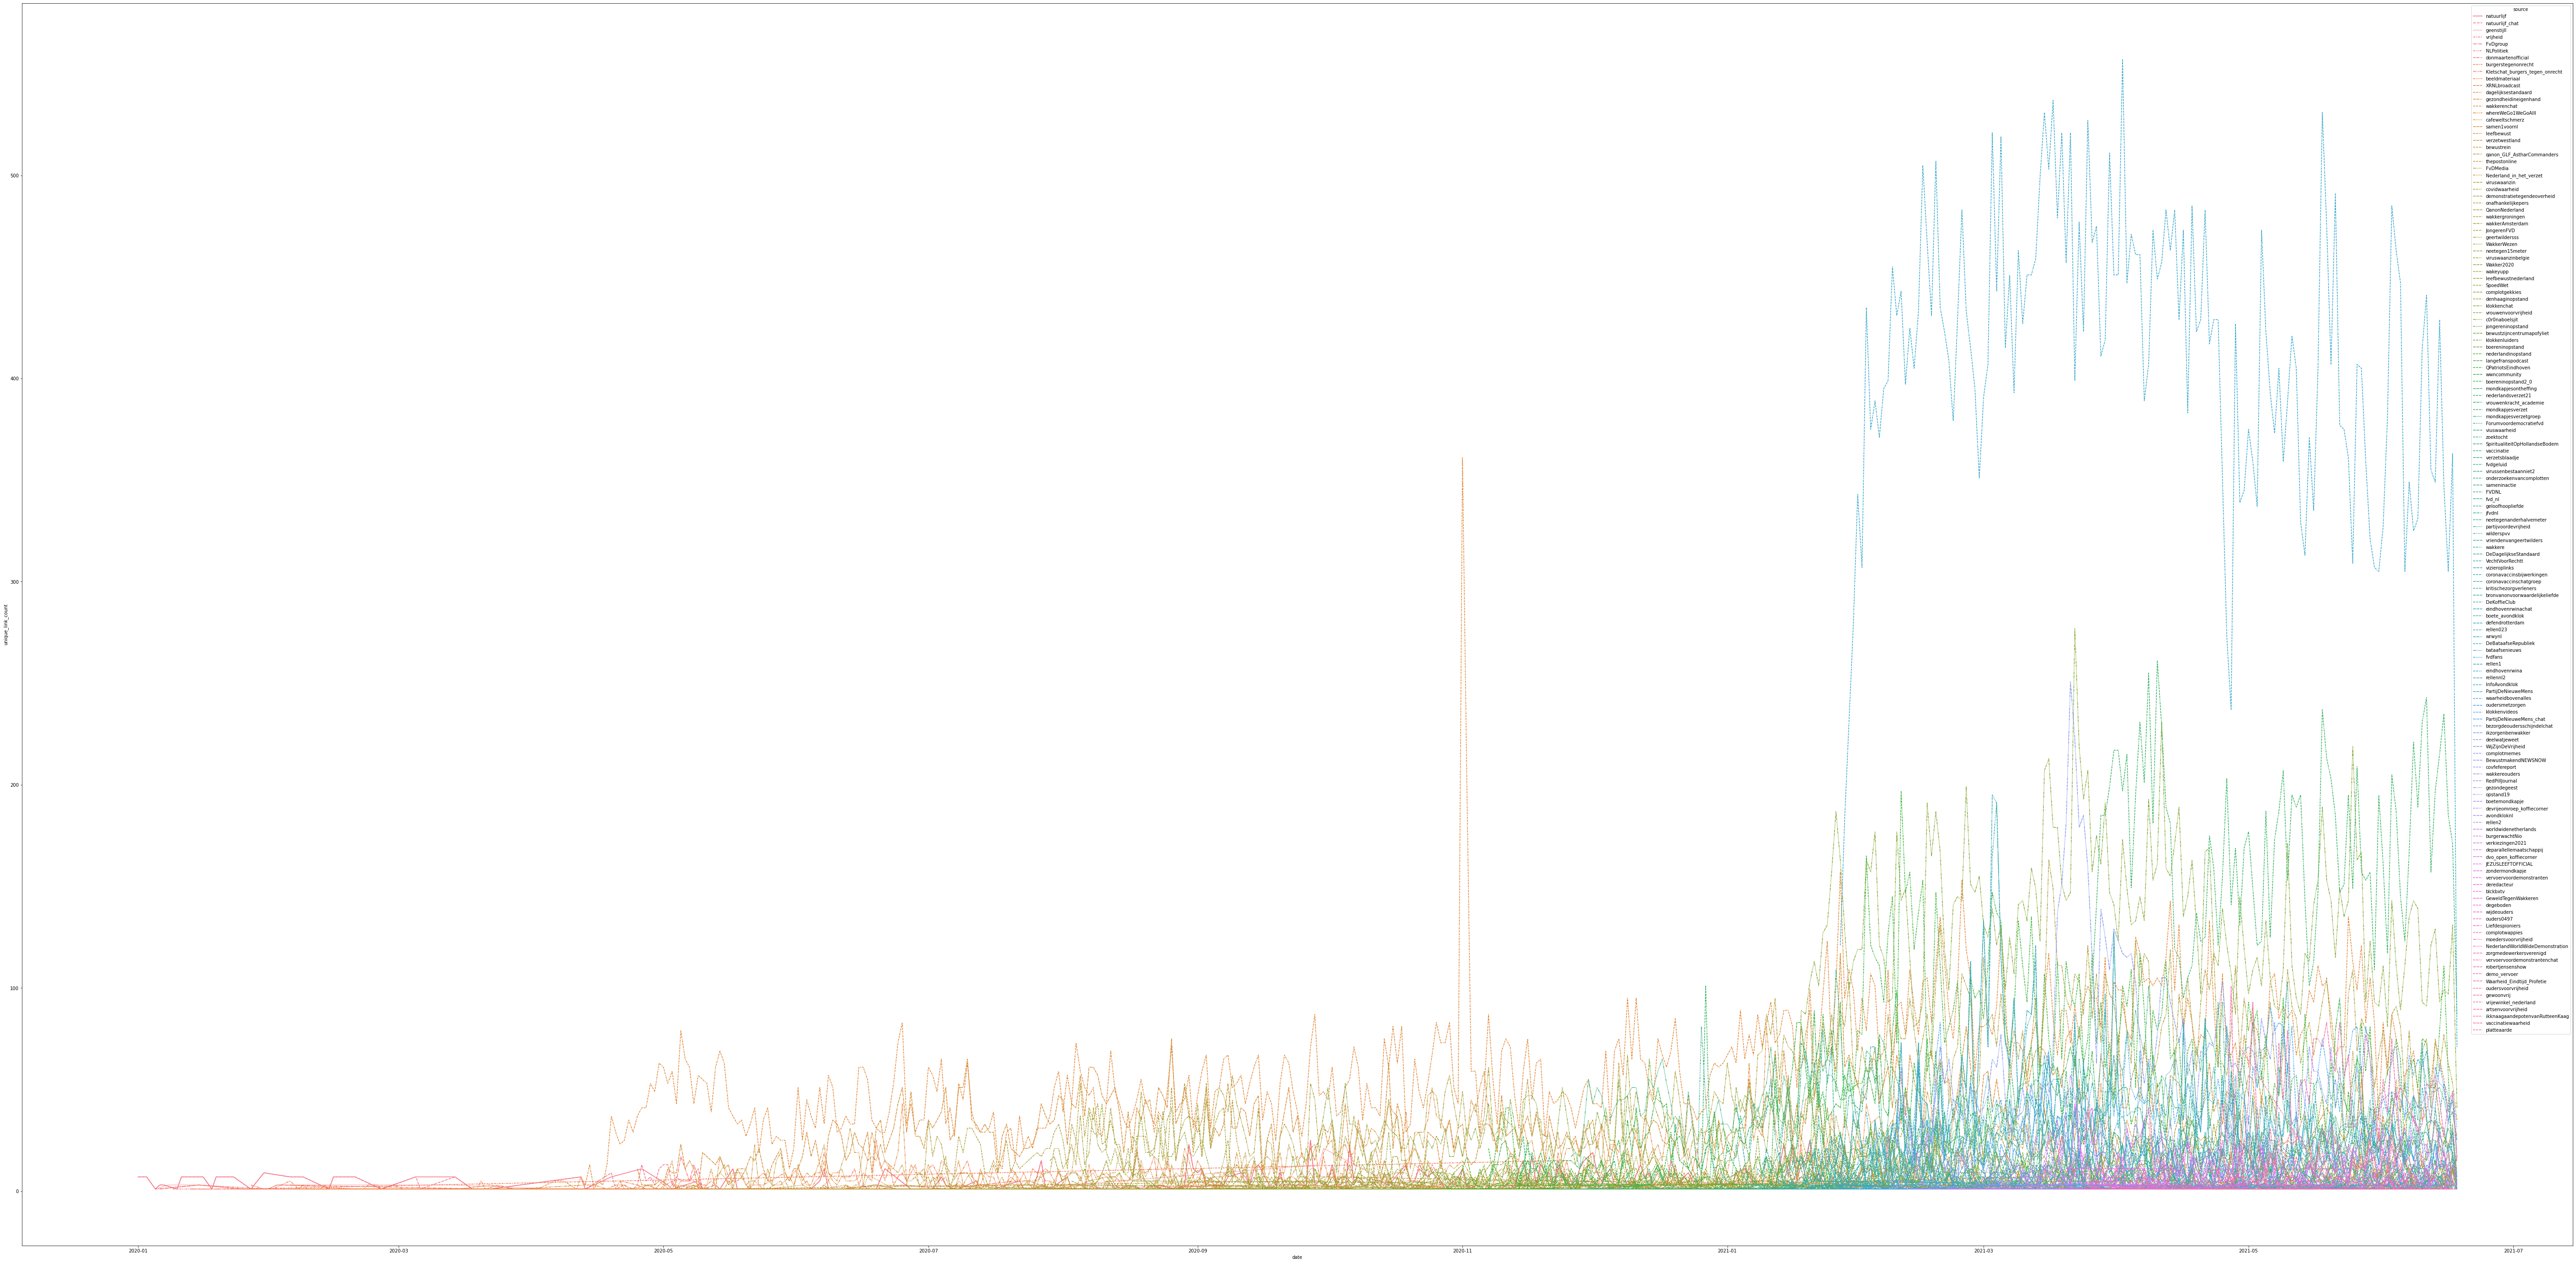

In [82]:
ax, fig = plt.subplots(figsize=[100, 50])
sns.lineplot(data=df2021,  x="date", y="unique_link_count", hue="source", style="source")

In [65]:
#df5.plot(x="date", y= "unique_link_count", legend = True, figsize =(50, 20))
#plt.show()

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data for Kasper for testing

In [ ]:
#data for testing fr Kasper
header = ["url", "date", "user_data"]
df1.to_csv('output.csv', columns = header)

In [ ]:
df = df[pd.notnull(df['text_clean'])] #dropped nans on clean text col

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] #remove unnamed colum

In [ ]:
#data = texts.text_clean.values.tolist() #convert documents to list
#data

# LDA Test

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(data))
print(data_words[:1])

In [ ]:
data_words

In [ ]:
ldainput_m1 = [text.split() for text in data]           # convert all strings to list of words
id2word_m1 = corpora.Dictionary(ldainput_m1)                       # assign a token_id to each word
ldacorpus_m1 = [id2word_m1.doc2bow(doc) for doc in ldainput_m1]       # represent each speech by (token_id, token_count) tuples

In [ ]:
nltk.download('stopwords')

mystopwords = set(stopwords.words('dutch')) # use default NLTK stopword list; alternatively:

# mystopwords = set(open('mystopwordfile.txt').readlines())  #read stopword list from a textfile with one stopword per line

data = [" ".join([w for w in text.split() if w not in mystopwords]) for text in data]

In [ ]:
lda_m1 = models.LdaModel(ldacorpus_m1, id2word=id2word_m1, num_topics=10)
lda_m1.print_topics()

In [ ]:
id2word_m4 = corpora.Dictionary(ldainput_m1) 

id2word_m4.filter_extremes(no_below=5, no_above=0.5)   # do not consider all words that occur in less than n=5 documents

# or in more than 50% of all documents.

ldacorpus_m4 = [id2word_m4.doc2bow(doc) for doc in ldainput_m1]
tfidfcorpus_m4 = models.TfidfModel(ldacorpus_m4)
lda_m4 = models.ldamodel.LdaModel(corpus=tfidfcorpus_m4[ldacorpus_m4],id2word=id2word_m4,num_topics=10, distributed=False, random_state=42) 
lda_m4.print_topics(num_words=5)

In [ ]:
data1 = [["_".join(tup) for tup in nltk.ngrams(text.split(),2)] for text in data]

In [ ]:
data1

In [ ]:
assert len(data)==len(data1)
data_uniandbigrams = []
for a,b in zip([text.split() for text in data],data1):
    data_uniandbigrams.append(a + b)

In [ ]:
len(data_uniandbigrams[6]),len(data1[6]),len(data[6].split())

In [ ]:
id2word_m5 = corpora.Dictionary(data_uniandbigrams)                       
id2word_m5.filter_extremes(no_below=5, no_above=0.5)
ldacorpus_m5 = [id2word_m5.doc2bow(doc) for doc in data_uniandbigrams]
tfidfcorpus_m5 = models.TfidfModel(ldacorpus_m5)
lda_m5 = models.ldamodel.LdaModel(corpus=tfidfcorpus_m5[ldacorpus_m5],id2word=id2word_m5,num_topics=10)
lda_m5.print_topics(num_words=5)

In [ ]:
vis_data = gensimvis.prepare(lda_m5,ldacorpus_m5,id2word_m5)
pyLDAvis.display(vis_data)

In [ ]:
data

# Other Trials with the text

In [73]:
#df = pd.DataFrame(df.groupby([pd.Grouper(freq ="D", key = 'date'), 'source'])['text_clean'].agg(lambda x: " | ".join(x)))
#df

/Users/m.simonuva.nl/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['amount_texts'] = df['text_clean'].str.count(r" \| ") +1
df['amount_words'] = df['text_clean'].map(lambda x: len(x.replace("|","").split()))
df

In [ ]:
df['amount_words'].max() #problematic

In [ ]:
df.loc[df['amount_words'] == 212489]

In [ ]:
df['amount_words'].min() #problematic

In [ ]:
df['amount_texts'].min()

In [ ]:
df['amount_texts'].max() #problematic

In [ ]:
df.loc[df['amount_texts'] == 7172]

In [ ]:
df1 = df[~(df['amount_words'] < 3)]  

In [ ]:
len(df)

In [ ]:
len(df1) #so only 240 rows with less than 3 words

In [ ]:
df = df.reset_index()

In [ ]:
df.plot(x="date", y= "amount_texts", legend = True, figsize =(50, 20))
plt.show()

In [ ]:
#df.plot(x="date", y= "amount_words", legend = True, figsize =(20, 12))
#plt.show()

## FastText test

### What can I do with this embedding space. what similarity measures can be computed and under what conditions.


In [ ]:
from gensim.models import FastText #would need the dutch one here most likely
from gensim.test.utils import common_texts  # some example sentences
#print(common_texts[0]

In [ ]:
#make list of lists for fasttest 
def make_listoflist(lst):
    res = []
    for el in lst:
        sub = el.split('| ')
        res.append(sub)
      
    return(res)

In [ ]:
test = make_listoflist(data) #for fastexts

In [ ]:
model = FastText(vector_size=100, window=3, min_count=1)
model.build_vocab(corpus_iterable=data)
model.train(corpus_iterable=data, total_examples=len(data), epochs=10)  # train

In [ ]:
wv = model.wv
print(wv)
print(wv['corona'])

In [ ]:
print(wv.similarity("corona", "thierry"))

In [ ]:
model2 = FastText(vector_size=4, window=3, min_count=1, sentences=data, epochs=10)

In [ ]:
np.allclose(model.wv['fvd'], model2.wv['fvd'])